# PROYECTO NO.1 
## Angel Chamo 


## 1. Paquetes y datos
Seleccionamos las librerias necesarias para realizar el proyecto 

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

Importamos los datos de la carpeta que se proporciono en las instrucciones. https://drive.google.com/file/d/1Y5vA7xxk68rjhon6_SJCIqhDn2mIyBZU/view 

In [57]:
data = np.load('proyecto_data/proyecto_training_data.npy')
print(data)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


Analizamos los datos 

In [58]:
# dimension 
print(data.shape)
# tipo
print(data.dtype)
# tamaño 
print(data.size)

(1460, 6)
float64
8760


## 2. Slicing
Realizamos el Slicing en el dataset, 80% del data set para entrenamiento y el 20% para confirmar los modelos. Primero debemos saber cual es el numero de filas en el dataset para realizar el slicing solicitado.

In [59]:
num_filas = data.shape[0]
print(num_filas)

1460


Teniendo en cuenta el numero de filas procedemos a realizar el slicing para el entrenamiento y validacion, seleccionando aleatoriamente el 80% de entrenamiento y 20% de validacion.

In [60]:
# seleccionamos aleatoriamente 80% de las filas del data set 
filas_training = np.random.choice(num_filas, size =int(num_filas * 0.8), replace = False)
# usamos las filas seleccionadas aleatoriamente para el dataset de entrenamiento
data_training = data[filas_training, :]
# seleccionamos las filas restantes para la validacion 
filas_validation = np.setdiff1d(np.arange(num_filas), filas_training)
# usamos las filas restantes para el dataset de validacion
data_validation = data[filas_validation,:]

## 3. Analisis exploratorio de datos
### MEDIA

In [61]:
media_SalePrice =    np.mean(data[:,0], axis=0)
media_OverallQual =  np.mean(data[:,1], axis=0)
media_1stFlrSF =     np.mean(data[:,2], axis=0)
media_TotRmsAbvGrd = np.mean(data[:,3], axis=0)
media_YearBuilt =    np.mean(data[:,4], axis=0)
media_LotFrontage =  np.nanmean(data[:,5], axis=0)

print("Media de Saleprice:", media_SalePrice)
print("Media de OverallQual:", media_OverallQual)
print("Media de 1stFlrSF:", media_1stFlrSF)
print("Media de TotRmsAbvGrd:", media_TotRmsAbvGrd)
print("Media de YearBuilt:", media_YearBuilt)
print("Media de LotFrontage:", media_LotFrontage)

Media de Saleprice: 180921.19589041095
Media de OverallQual: 6.0993150684931505
Media de 1stFlrSF: 1162.626712328767
Media de TotRmsAbvGrd: 6.517808219178082
Media de YearBuilt: 1971.267808219178
Media de LotFrontage: 70.04995836802665


## VALOR MAXIMO

In [62]:
max_SalePrice =    np.max(data[:,0],axis=0)
max_OverallQual =  np.max(data[:,1],axis=0)
max_1stFlrSF =     np.max(data[:,2],axis=0)
max_TotRmsAbvGrd = np.max(data[:,3],axis=0)
max_YearBuilt =    np.max(data[:,4],axis=0)
max_LotFrontage =  np.nanmax(data[:,5],axis=0)

print("Valor maximo de Saleprice:",    max_SalePrice)
print("Valor maximo de OverallQual:",  max_OverallQual)
print("Valor maximo de 1stFlrSF:",     max_1stFlrSF)
print("Valor maximo de TotRmsAbvGrd:", max_TotRmsAbvGrd)
print("Valor maximo de YearBuilt:",    max_YearBuilt)
print("Valor maximo de LotFrontage:",  max_LotFrontage)

Valor maximo de Saleprice: 755000.0
Valor maximo de OverallQual: 10.0
Valor maximo de 1stFlrSF: 4692.0
Valor maximo de TotRmsAbvGrd: 14.0
Valor maximo de YearBuilt: 2010.0
Valor maximo de LotFrontage: 313.0


## VALOR MINIMO

In [63]:
min_SalePrice =    np.min(data[:,0],axis=0)
min_OverallQual =  np.min(data[:,1],axis=0)
min_1stFlrSF =     np.min(data[:,2],axis=0)
min_TotRmsAbvGrd = np.min(data[:,3],axis=0)
min_YearBuilt =    np.min(data[:,4],axis=0)
min_LotFrontage =  np.nanmin(data[:,5],axis=0)

print("Valor minimo de Saleprice:",    min_SalePrice)
print("Valor minimo de OverallQual:",  min_OverallQual)
print("Valor minimo de 1stFlrSF:",     min_1stFlrSF)
print("Valor minimo de TotRmsAbvGrd:", min_TotRmsAbvGrd)
print("Valor minimo de YearBuilt:",    min_YearBuilt)
print("Valor minimo de LotFrontage:",  min_LotFrontage)

Valor minimo de Saleprice: 34900.0
Valor minimo de OverallQual: 1.0
Valor minimo de 1stFlrSF: 334.0
Valor minimo de TotRmsAbvGrd: 2.0
Valor minimo de YearBuilt: 1872.0
Valor minimo de LotFrontage: 21.0


## Rango

In [64]:
rango_SalePrice =    np.ptp(data[:,0])
rango_OverallQual =  np.ptp(data[:,1])
rango_1stFlrSF =     np.ptp(data[:,2])
rango_TotRmsAbvGrd = np.ptp(data[:,3])
rango_YearBuilt =    np.ptp(data[:,4])
rango_LotFrontage =  max_LotFrontage - min_LotFrontage 

print("Rango Peak to Peak de Saleprice:",    rango_SalePrice)
print("Rango Peak to Peak de OverallQual:",  rango_OverallQual)
print("Rango Peak to Peak de 1stFlrSF:",     rango_1stFlrSF)
print("Rango Peak to Peak de TotRmsAbvGrd:", rango_TotRmsAbvGrd)
print("Rango Peak to Peak de YearBuilt:",    rango_YearBuilt)
print("Rango Peak to Peak de LotFrontage:",  rango_LotFrontage)

Rango Peak to Peak de Saleprice: 720100.0
Rango Peak to Peak de OverallQual: 9.0
Rango Peak to Peak de 1stFlrSF: 4358.0
Rango Peak to Peak de TotRmsAbvGrd: 12.0
Rango Peak to Peak de YearBuilt: 138.0
Rango Peak to Peak de LotFrontage: 292.0


## Desviasion Estandar

In [65]:
dst_SalePrice =    np.std(data[:,0], axis=0)
dst_OverallQual =  np.std(data[:,1], axis=0)
dst_1stFlrSF =     np.std(data[:,2], axis=0)
dst_TotRmsAbvGrd = np.std(data[:,3], axis=0)
dst_YearBuilt =    np.std(data[:,4], axis=0)
dst_LotFrontage =  np.nanstd(data[:,5], axis=0)

print("La desviasion estandar de Saleprice:",    dst_SalePrice)
print("La desviasion estandar de OverallQual:",  dst_OverallQual)
print("La desviasion estandar de 1stFlrSF:",     dst_1stFlrSF)
print("La desviasion estandar de TotRmsAbvGrd:", dst_TotRmsAbvGrd)
print("La desviasion estandar de YearBuilt:",    dst_YearBuilt)
print("La desviasion estandar de LotFrontage:",  dst_LotFrontage)

La desviasion estandar de Saleprice: 79415.29188606751
La desviasion estandar de OverallQual: 1.3825228366585953
La desviasion estandar de 1stFlrSF: 386.45532230228963
La desviasion estandar de TotRmsAbvGrd: 1.624836553698191
La desviasion estandar de YearBuilt: 30.192558810489448
La desviasion estandar de LotFrontage: 24.27463944767604


## 4. Estadística descriptiva

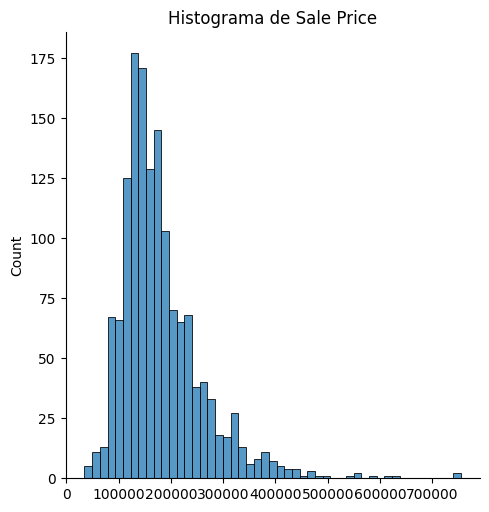

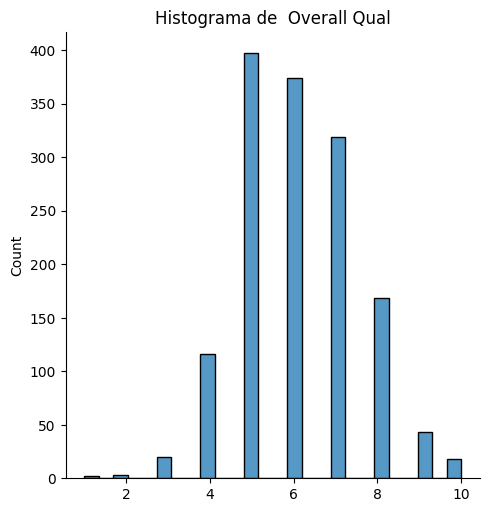

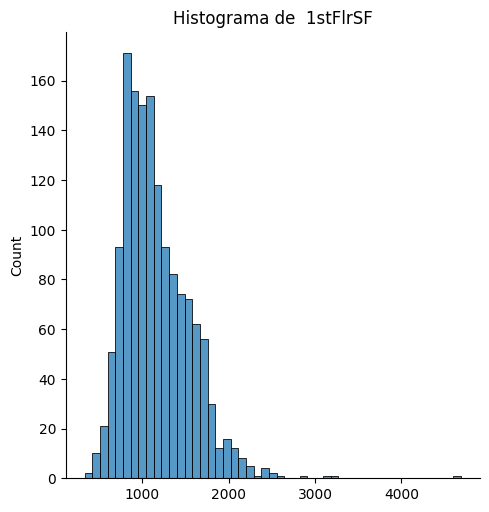

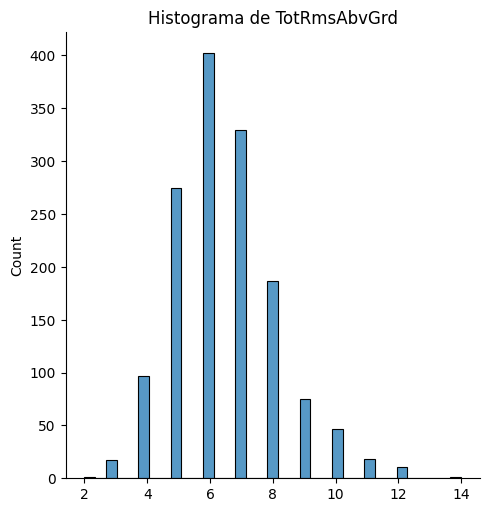

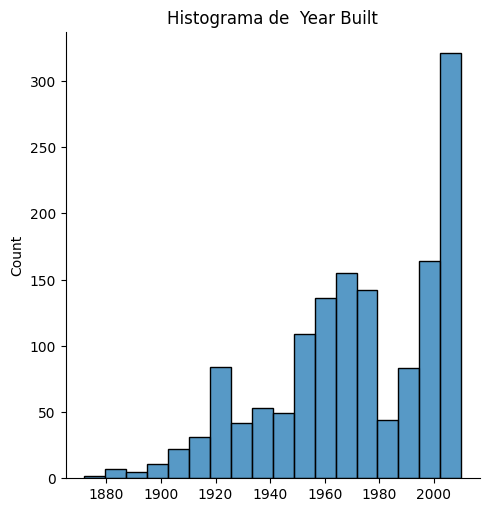

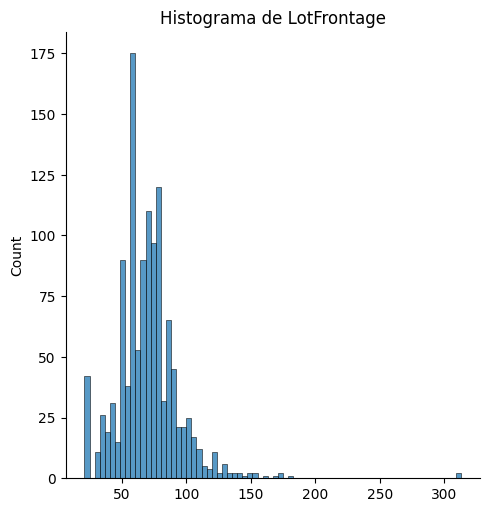

In [66]:
sns.displot(data[:,0])
plt.title("Histograma de Sale Price")
plt.show()

sns.displot(data[:,1])
plt.title("Histograma de  Overall Qual")
plt.show()

sns.displot(data[:,2])
plt.title("Histograma de  1stFlrSF")
plt.show()

sns.displot(data[:,3])
plt.title("Histograma de TotRmsAbvGrd")
plt.show()

sns.displot(data[:,4])
plt.title("Histograma de  Year Built")
plt.show()

sns.displot(data[:,5])
plt.title("Histograma de LotFrontage")
plt.show()

## Analisis variable independiente
Como variable dependiente se utilizara el precio de las casas, de esta manera analizar cuales son los factores de los precios de las casas y como impactan en el precio. Por lo tanto, las variables independientes seran: Over all Qual, First floor square feet, total rooms, construction date y linear feet of street connected to property. 

### Over All Quality vrs. Sale Price

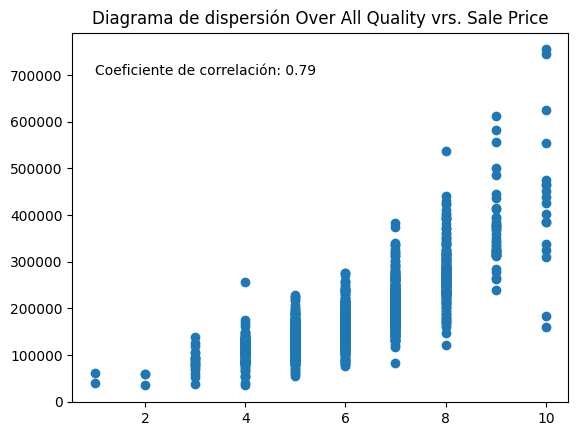

In [67]:
# Se calcula el coeficiente de correlación
corr_coef = np.corrcoef(data[:,1],data[:,0])[0, 1]
# Se crea el diagrama de dispersión
plt.scatter(data[:,1],data[:,0])
# Se agrega el coeficiente de correlación en el gráfico
plt.text(1, 700000, f'Coeficiente de correlación: {corr_coef:.2f}')
# Se agrega un título al diagrama
plt.title('Diagrama de dispersión Over All Quality vrs. Sale Price')
plt.show()

### First floor square feet vrs. Sale Price

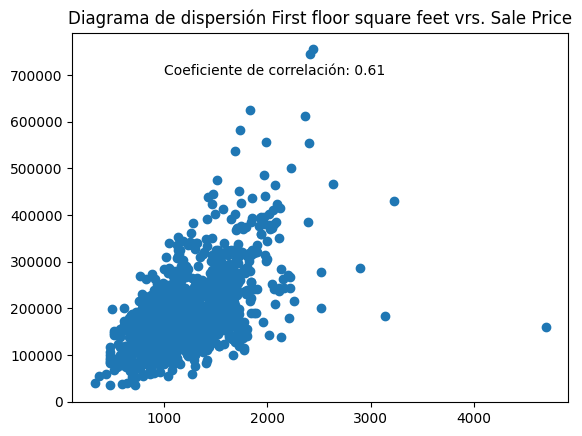

In [68]:
# Se calcula el coeficiente de correlación
corr_coef = np.corrcoef(data[:,2],data[:,0])[0, 1]
# Se crea el diagrama de dispersión
plt.scatter(data[:,2],data[:,0])
# Se agrega el coeficiente de correlación en el gráfico
plt.text(1000, 700000, f'Coeficiente de correlación: {corr_coef:.2f}')
# Se agrega un título al diagrama
plt.title('Diagrama de dispersión First floor square feet vrs. Sale Price')
plt.show()

### total rooms vrs. Sale Price

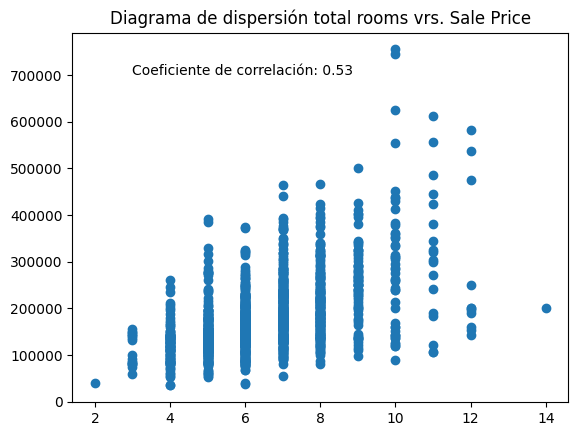

In [69]:
# Se calcula el coeficiente de correlación
corr_coef = np.corrcoef(data[:,3],data[:,0])[0, 1]
# Se crea el diagrama de dispersión
plt.scatter(data[:,3],data[:,0])
# Se agrega el coeficiente de correlación en el gráfico
plt.text(3, 700000, f'Coeficiente de correlación: {corr_coef:.2f}')
# Se agrega un título al diagrama
plt.title('Diagrama de dispersión total rooms vrs. Sale Price')
plt.show()

### construction date vrs. Sale price

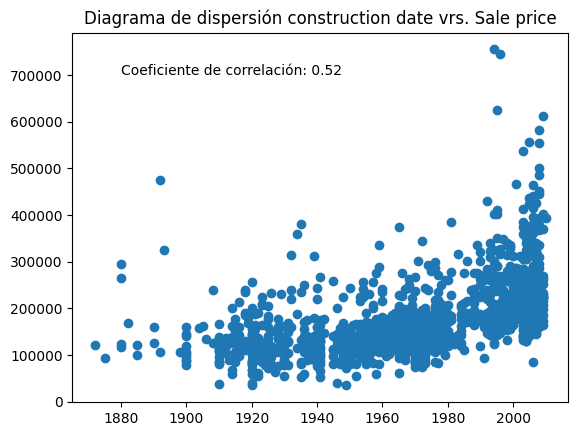

In [70]:
# Se calcula el coeficiente de correlación
corr_coef = np.corrcoef(data[:,4],data[:,0])[0, 1]
# Se crea el diagrama de dispersión
plt.scatter(data[:,4],data[:,0])
# Se agrega el coeficiente de correlación en el gráfico
plt.text(1880, 700000, f'Coeficiente de correlación: {corr_coef:.2f}')
# Se agrega un título al diagrama
plt.title('Diagrama de dispersión construction date vrs. Sale price')
plt.show()

### linear feet of street connected to propertyvrs. Sale price

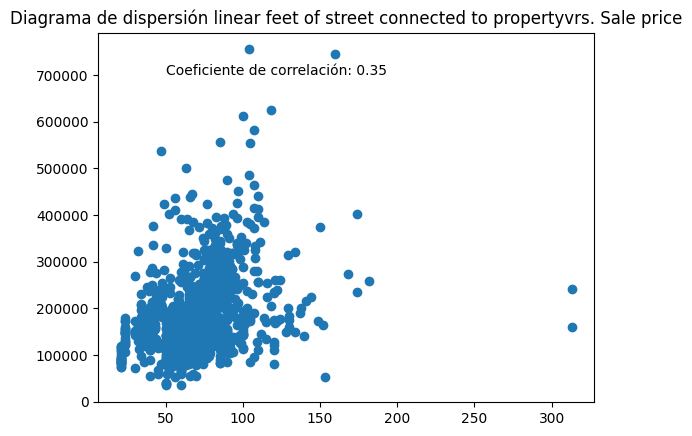

In [71]:
# Como la variable linear feet of street tiene Nan's es necesario eliminarlos 
x = data[:,5]
y = data[:,0]
no_nan_indices = ~np.isnan(x)
# Filtrar ambas variables para eliminar los valores NaN en x
x_no_nan = np.array(x)[no_nan_indices]
y_no_nan = np.array(y)[no_nan_indices]
# Calcular el coeficiente de correlación entre x_no_nan e y_no_nan
corr = np.corrcoef(x_no_nan, y_no_nan)[0, 1]
# Se crea el diagrama de dispersión
plt.scatter(x,y)
# Se agrega el coeficiente de correlación en el gráfico
plt.text(50, 700000, f'Coeficiente de correlación: {corr:.2f}')
# Se agrega un título al diagrama
plt.title('Diagrama de dispersión linear feet of street connected to propertyvrs. Sale price')
plt.show()

## modelo de regresión lineal

In [72]:
class Modelo:
    def __int__(self, x, y, epoch, learning): 
        self.x = x 
        self.y = y
        self.epochs = epoch 
        self.learning = learning

    def reg(x,y,epoch,learning): 
        b0 = 0
        b1 = 0 

        filas_de_unos = np.ones_like(x).reshape(-1,1)
        x = np.reshape(x,(-1,1))
        A = np.hstack([x, filas_de_unos])
        betas = np.array([b0,b1])
        
        diccionario = {}

        for i in range(epoch): 
            y_estimada = np.dot(A, betas)
            error = np.mean(np.power(y - y_estimada,2))

            delta_b0 = np.mean(y_estimada - y)
            delta_b1 = np.mean(np.dot(y_estimada - y, x))

            b0 = b0 - learning*delta_b0 
            b1 = b1 - learning*delta_b1
            betas = np.array([b0,b1]).reshape(-1,1)
            
            diccionario[i] = (b0,b1)

            if i % 10 == 0: 
                print(f'Iteracion: {i} | error: {error} | b0: {betas[0,:]} | b1: {betas[1,:]}')


In [73]:
Modelo.reg(data_training[:,0], data_training[:,1], epoch = 100, learning = 0.0001)

Iteracion: 0 | error: 39.16609589041096 | b0: [0.0006101] | b1: [139580.5088]
Iteracion: 10 | error: 1.4614884773639978e+88 | b0: [1.20886327e+40] | b1: [2.56086699e+48]
Iteracion: 20 | error: 4.920575218352999e+174 | b0: [2.21813218e+83] | b1: [4.69891146e+91]
Iteracion: 30 | error: 1.6566713220441936e+261 | b0: [4.07003048e+126] | b1: [8.62198974e+134]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/c0/gmnjtk656jx81ybjd3x7w3cm0000gn/T/ipykernel_17173/1440853525.py:21: RuntimeWarning: overflow encountered in power
  error = np.mean(np.power(y - y_estimada,2))


Iteracion: 40 | error: inf | b0: [7.46806177e+169] | b1: [1.58204102e+178]
Iteracion: 50 | error: inf | b0: [1.37030784e+213] | b1: [2.90287263e+221]
Iteracion: 60 | error: inf | b0: [2.51436534e+256] | b1: [5.32645449e+264]


/var/folders/c0/gmnjtk656jx81ybjd3x7w3cm0000gn/T/ipykernel_17173/1440853525.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  b1 = b1 - learning*delta_b1


Iteracion: 70 | error: inf | b0: [inf] | b1: [nan]
Iteracion: 80 | error: nan | b0: [nan] | b1: [nan]
Iteracion: 90 | error: nan | b0: [nan] | b1: [nan]


### REGRESION CON SCIKIT LEARN

### Over All Quality vrs. Sale Price

B0  [-96412.32463948]
B1  [[45530.52317975]]
r2  0.6218975393184334
mse  2449593554.0899587


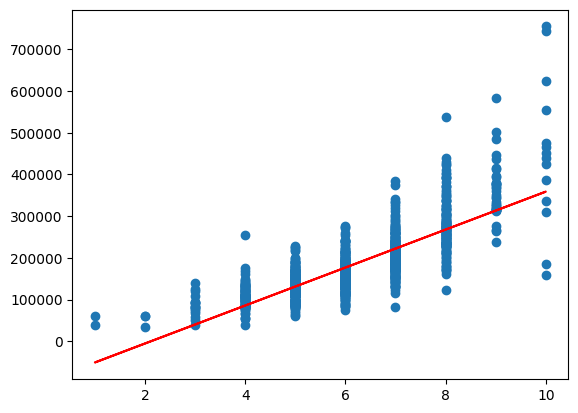

In [89]:
regresion = linear_model.LinearRegression()

x = data_training[:,1].reshape(-1,1)
y = data_training[:,0].reshape(-1,1)

modelo = regresion.fit(x,y)
y_pred = regresion.predict(x)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("B0 ", modelo.intercept_)
print("B1 ", modelo.coef_)
print('r2 ', r2)
print('mse ', mse)

plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.show()

### First floor square feet vrs. Sale Price

B0  [35992.30824122]
B1  [[124.84607414]]
r2  0.3644433295872207
mse  4117549302.1009088


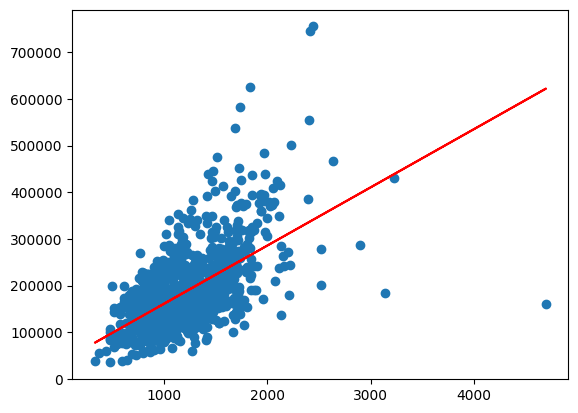

In [91]:
regresion = linear_model.LinearRegression()

x = data_training[:,2].reshape(-1,1)
y = data_training[:,0].reshape(-1,1)

modelo = regresion.fit(x,y)
y_pred = regresion.predict(x)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("B0 ", modelo.intercept_)
print("B1 ", modelo.coef_)
print('r2 ', r2)
print('mse ', mse)

plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.show()

### total rooms vrs. Sale Price

B0  [10020.97234316]
B1  [[26274.9661682]]
r2  0.2825942720160233
mse  4647820709.151072


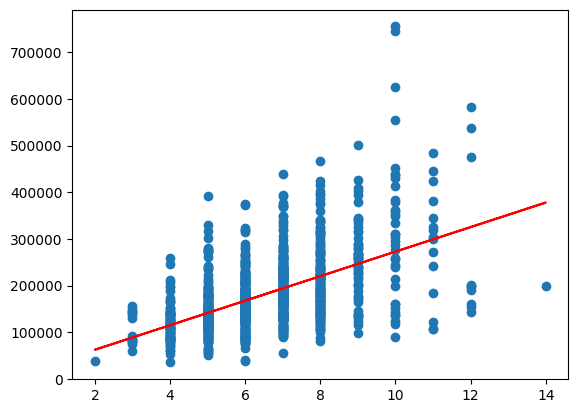

In [92]:
regresion = linear_model.LinearRegression()

x = data_training[:,3].reshape(-1,1)
y = data_training[:,0].reshape(-1,1)

modelo = regresion.fit(x,y)
y_pred = modelo.predict(x)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("B0 ", modelo.intercept_)
print("B1 ", modelo.coef_)
print('r2 ', r2)
print('mse ', mse)

plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.show()

### construction date vrs. Sale price

B0  [-2555104.09027203]
B1  [[1388.0901465]]
r2  0.2726505011020589
mse  4712242921.824023


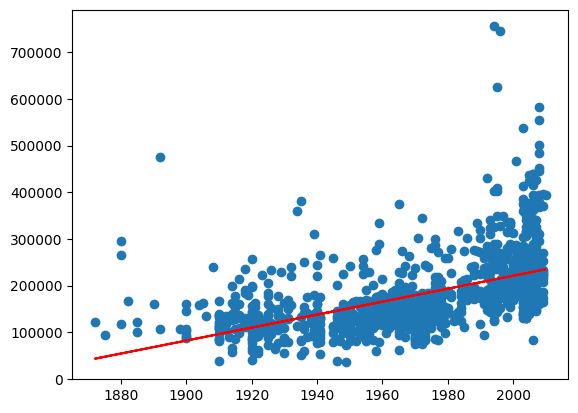

In [97]:
regresion = linear_model.LinearRegression()

x = data_training[:,4].reshape(-1,1)
y = data_training[:,0].reshape(-1,1)

modelo = regresion.fit(x,y)
y_pred = modelo.predict(x)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("B0 ", modelo.intercept_)
print("B1 ", modelo.coef_)
print('r2 ', r2)
print('mse ', mse)

plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.show()

### linear feet of street connected to propertyvrs. Sale price

B0  [93039.02226904]
B1  [[1272.67114297]]
r2  0.11146624630354529
mse  5756499314.293678


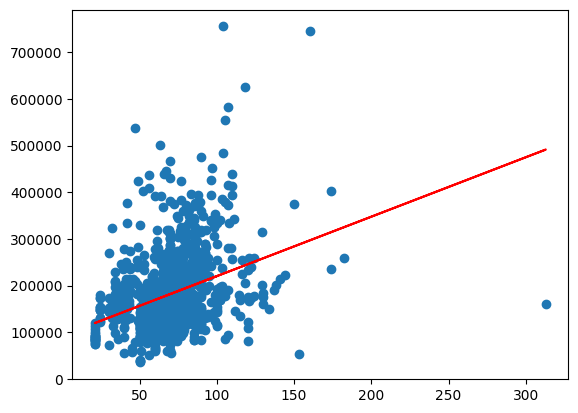

In [100]:
regresion = linear_model.LinearRegression()

x = data_training[:,5].reshape(-1,1)
y = data_training[:,0].reshape(-1,1)

# Imputar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

modelo = regresion.fit(x,y)
y_pred = modelo.predict(x)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("B0 ", modelo.intercept_)
print("B1 ", modelo.coef_)
print('r2 ', r2)
print('mse ', mse)

plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.show()